**# Problem statement**: The dataset consist of customer who churned from a bank.Based on independent features predict churn of customers using a neural network.

**# Dependencies**

In [0]:
import json
import numpy as np   ######### matrix operation
import pandas as pd ######### pandas for data manipulation ,dataframe ,read_csv
import seaborn as sns  ###### data visualization library based on matplotlib
import matplotlib.pyplot as plt   ###### state-based interface to matplotlib for plotting graph
%matplotlib inline
from sklearn.preprocessing import LabelEncoder    ######### used for converting categorical values into numerical values
from sklearn.preprocessing import StandardScaler    ####### used for standard scaling
from sklearn.model_selection import train_test_split,GridSearchCV  ######## splitting of dataset
from numpy import loadtxt
from keras.models import Sequential  #### Keras is a simple tool for constructing a neural network
from keras.layers import Dense
from sklearn.metrics import confusion_matrix ##### for confusion matrix
from mlxtend.plotting import plot_confusion_matrix
import warnings   ###### useful to alert the user of some condition
warnings.filterwarnings('ignore')

 #Import the csv dataset from https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

In [47]:
# To install Kaggle in collab
!pip install kaggle
!ls
!mkdir .kaggle

Churn_Modelling.csv  predicting-churn-for-bank-customers.zip  sample_data
mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
token = {"username":"jaikumartv","key":"d523c960653acd40970baeb9fe617802"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [51]:
!kaggle datasets download -d adammaus/predicting-churn-for-bank-customers -p /content

predicting-churn-for-bank-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
!unzip -n \*.zip      ##### unzipping the file 

Archive:  predicting-churn-for-bank-customers.zip


In [53]:
bank_data = pd.read_csv("Churn_Modelling.csv")   ##### Read CSV file to dataframe
bank_data.head()            ##### check data has been read in properly

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
bank_data.columns  

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [56]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**# Data Preprocessing**

In [57]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
bank_data.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [59]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [60]:
bank_data.isin(['?']).sum(axis=0)  #####  missing values for Categorical attributes

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [61]:
bank_data.isin([0]).sum(axis=0)   ##### missing values for numerical attributes

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Exited             7963
dtype: int64

**# Data Visualization**

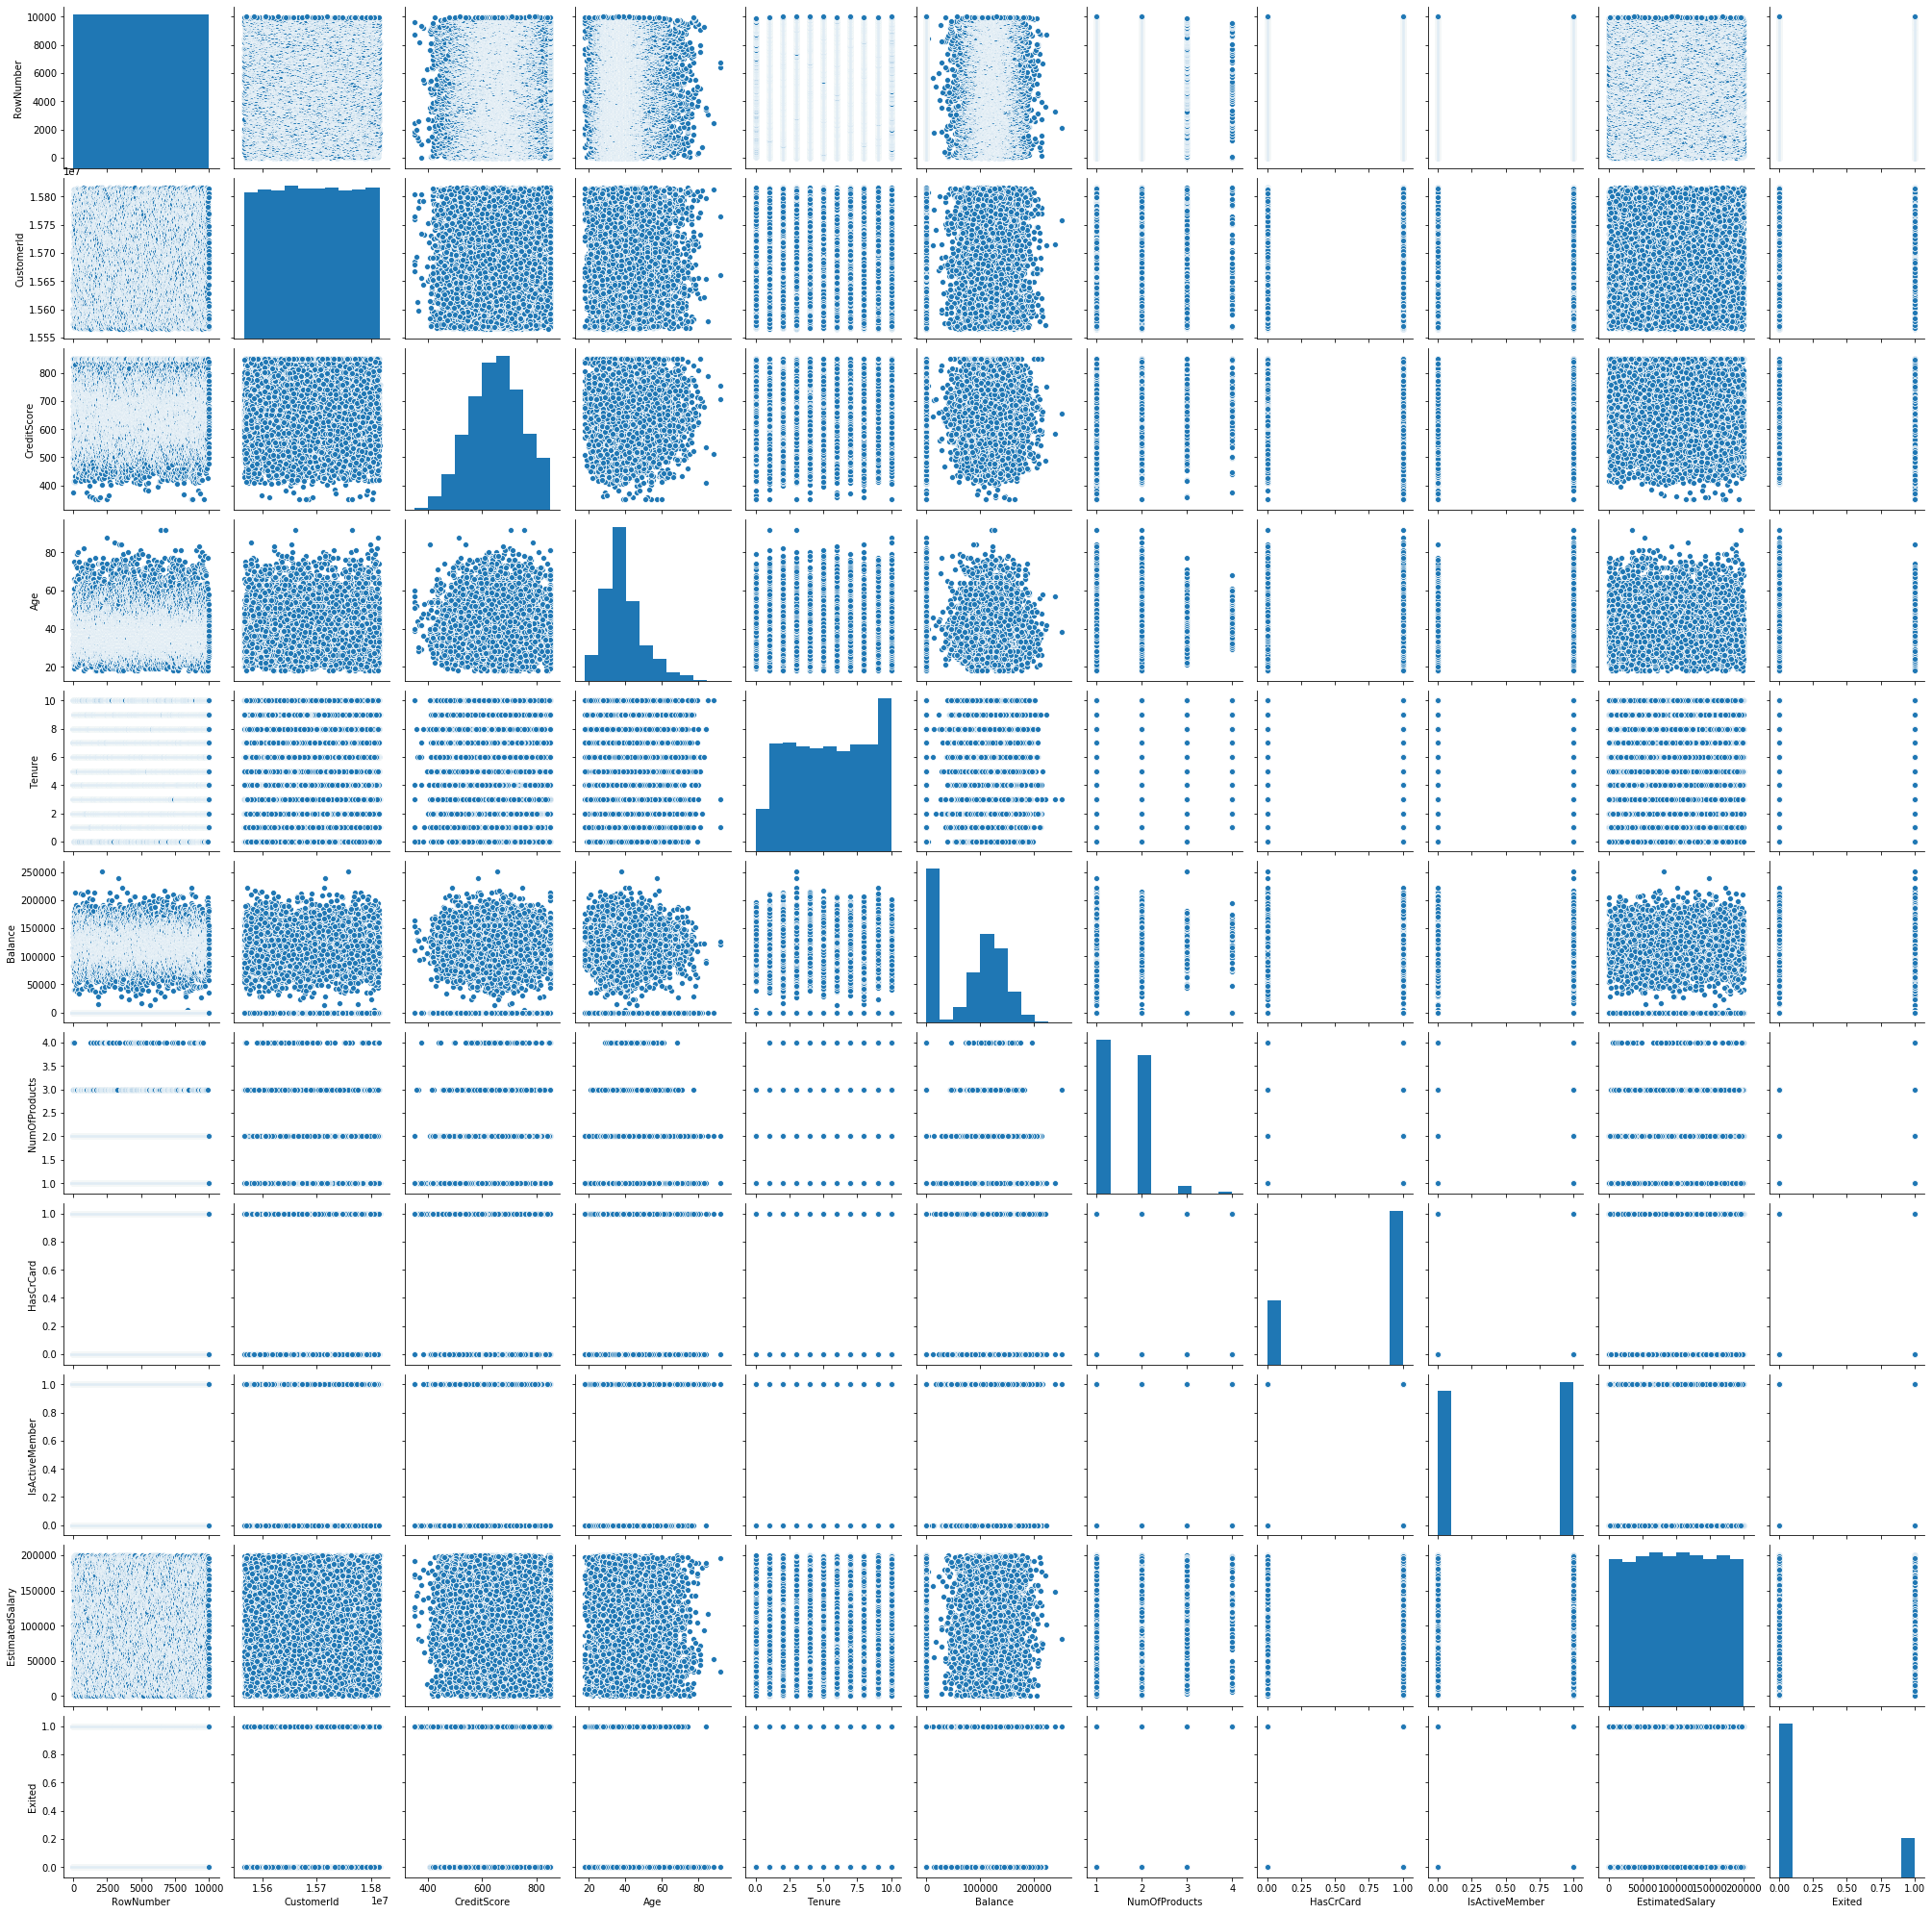

In [62]:
sns.pairplot(bank_data)

**#**
**Extract X as all columns except the Exited column and Y as Exited column**

In [0]:
X = bank_data.drop(['Exited'], axis=1)  ####### Assigning all columns except last column to X variable
Y=bank_data.iloc[:,-1]    ####### Assigning last column Y variable 

In [64]:
print("Lenght of X :",len(X))   ######## printing the length of vars
print("Length of Y :",len(Y))
X.head() ###### check that the target variable has been removed


Lenght of X : 10000
Length of Y : 10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [65]:
Y.head() 

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**#**
**Removing columns which don’t help the problem statement**

In [66]:
X.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace=True) 
X   ##### checking after removing the columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#
**Encode all the categorical columns into numeric**

In [0]:
def encoding(dataset):    ####### function to encode categorical values to numerical values
    le = LabelEncoder()
    for col in dataset.columns:
        if dataset[col].dtypes =='object':            ####### when column's data type is equal to object
            dataset[col] = le.fit_transform(dataset[col]) 
    return dataset

In [68]:
encoded_bank_data = encoding(X)
encoded_bank_data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [69]:
encoded_bank_data['Gender'].unique()

array([0, 1])

#
**Feature** **Scaling**

In [0]:
scaler = StandardScaler()   ###### to normalize the data
X = scaler.fit_transform(X)

In [71]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

 **#**
  **Split up the dataset into train and test dataset**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 13)  ###### splits out data into a training set and a test set with random state
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 10)
(3300, 10)
(6700,)
(3300,)


# **# Building Neural Network**

#
defininig the neural network model

In [0]:
model = Sequential() #### specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify
model.add(Dense(12, input_dim=10, activation='relu'))  #### used to add a layer to our neural network
model.add(Dense(8, activation='relu'))   ##### DENSE used to specify the fully connected layer
model.add(Dense(1, activation='sigmoid'))  ######## Activation allows models to take into account nonlinear relationships

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


**#**
**Training model**

#
Specify the loss function and the optimizer

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print("===================================================")
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
10000/10000 [==============================] - 1s 140us/step - loss: 0.5051 - acc: 0.7698
Epoch 2/10
10000/10000 [==============================] - 1s 121us/step - loss: 0.4007 - acc: 0.8346
Epoch 3/10
10000/10000 [==============================] - 1s 124us/step - loss: 0.3723 - acc: 0.8478
Epoch 4/10
10000/10000 [==============================] - 1s 122us/step - loss: 0.3571 - acc: 0.8535
Epoch 5/10
10000/10000 [==============================] - 1s 126us/step - loss: 0.3503 - acc: 0.8557
Epoch 6/10
10000/10000 [==============================] - 1s 125us/step - loss: 0.3458 - acc: 0.8572
Epoch 7/10
10000/10000 [==============================] - 1s 125us/step - loss: 0.3433 - acc: 0.8589
Epoch 8/10
10000/10000 [==============================] - 1s 126us/step - loss: 0.3417 - acc: 0.8589
Epoch 9/10
10000/10000 [==============================] - 1s 122us/step - loss: 0.3394 - acc: 0.8590
Epoch 10/10
10000/10000 [==============================] - 0s 21us/step
Accuracy: 86.33


In [76]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 6700 samples, validate on 3300 samples
Epoch 1/100
6700/6700 [==============================] - 0s 26us/step - loss: 0.3288 - acc: 0.8664 - val_loss: 0.3455 - val_acc: 0.8570
Epoch 2/100
6700/6700 [==============================] - 0s 26us/step - loss: 0.3278 - acc: 0.8664 - val_loss: 0.3462 - val_acc: 0.8573
Epoch 3/100
6700/6700 [==============================] - 0s 28us/step - loss: 0.3274 - acc: 0.8661 - val_loss: 0.3470 - val_acc: 0.8573
Epoch 4/100
6700/6700 [==============================] - 0s 27us/step - loss: 0.3272 - acc: 0.8657 - val_loss: 0.3471 - val_acc: 0.8573
Epoch 5/100
6700/6700 [==============================] - 0s 27us/step - loss: 0.3268 - acc: 0.8660 - val_loss: 0.3480 - val_acc: 0.8576
Epoch 6/100
6700/6700 [==============================] - 0s 27us/step - loss: 0.3266 - acc: 0.8667 - val_loss: 0.3474 - val_acc: 0.8567
Epoch 7/100
6700/6700 [==============================] - 0s 27us/step - loss: 0.3263 - acc: 0.8667 - val_loss: 0.3480 - val_acc: 0.8564


In [0]:
y_pred = model.predict(X_test)   ####### model prediction
y_pred = (y_pred > 0.5)

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)      ####### confusion matrix
print("Confusion Matrix : ",conf_matrix)

Confusion Matrix :  [[2505  104]
 [ 393  298]]


#
Plotting Confusion Matrix Graph


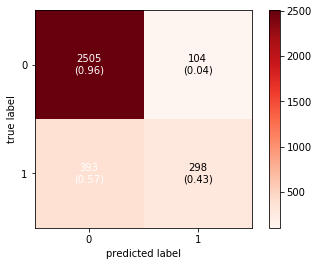

In [79]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,
                                show_absolute=True,
                                show_normed=True, 
                                cmap=plt.cm.Reds,
                                colorbar=True)
plt.show()

In [80]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

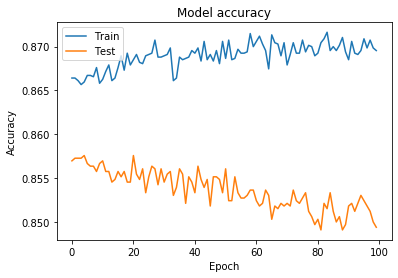

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

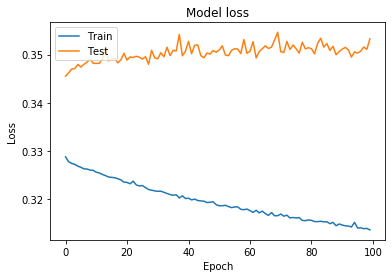

In [82]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Overfitting if: training loss << validation loss

Underfitting if: training loss >> validation loss

Just right if training loss ~ validation loss